## Heart Disease Analysis and Risk Classification

With this notebook I am going to try to analyze a heart disease [dataset](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive) and try to predict heart disease risk. 

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [2]:
heart_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
heart_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


As we can see we have 12 columns in total. These are from left to right, Age, Sex, Chest pain type, resting blood pressure, serum cholesterol, fasting blood pressure,
resting electrocardiogram results, maximum heart rate, exercise induced angina, oldpeak, ST slope and target, which stands for heart disease or not. 

### Data Cleaning and Preprocessing

#### Preprocessing

In [3]:
heart_data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

Since all attributes are already encoded and either int64 or float64 datatype there is not much preprocessing to do.

#### Data Cleaning

First I remove the duplicates if there are any

In [4]:
heart_data[heart_data.duplicated(keep=False)]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
90,49,0,2,110,208,0,0,160,0,0.0,1,0
163,49,0,2,110,208,0,0,160,0,0.0,1,0
556,58,1,3,150,219,0,1,118,1,0.0,2,1
604,58,1,3,150,219,0,1,118,1,0.0,2,1
617,70,1,4,130,322,0,2,109,0,2.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [5]:
heart_data.drop_duplicates()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


Because we dont have any data e.g. in type date or str, we dont need to do any more cleaning. 

### Data Analysis

For a first analysis lets plot the distribution of male and female data

<Axes: xlabel='sex', ylabel='count'>

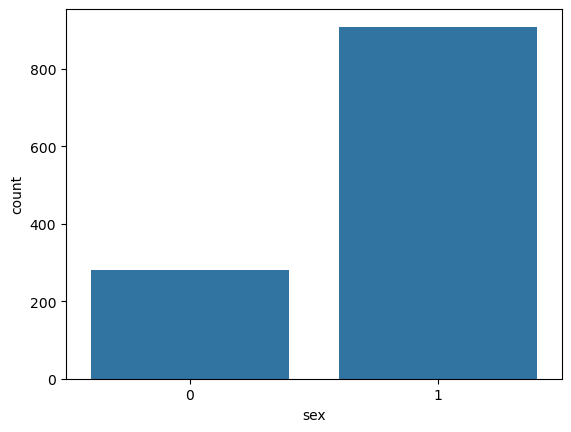

In [6]:
sns.countplot(data=heart_data, x="sex")

0 = female & 1 = male.
We can see that the dataset is very male dominant.

<Axes: xlabel='sex', ylabel='percent'>

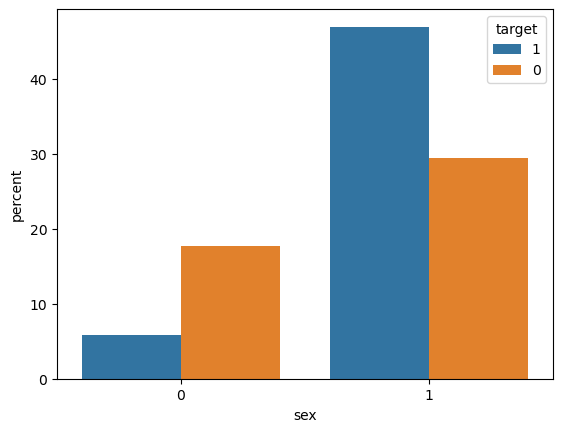

In [7]:
# convert column target to string type
heart_data['target'] = heart_data['target'].astype(str)

sns.countplot(data=heart_data, x="sex", hue="target", stat="percent")

target: 0 = no heart disease & 1 = heart disease
We observe that in female cases the patient is more likely to not have heart disease.
Male patients are more likely to have heart disease.  